# Reading The Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
path = r'I:\Python\dataSet\ml\customer bank churn\Customer-Churn-Records.csv'

In [65]:
main_data = pd.read_csv(path)
df = main_data.copy()
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [66]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Data Exploration

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [70]:
df.isna().sum().reset_index()

,index,0
0,CreditScore,0
1,Geography,0
2,Gender,0
3,Age,0
4,Tenure,0
5,Balance,0
6,NumOfProducts,0
7,HasCrCard,0
8,IsActiveMember,0
9,EstimatedSalary,0


In [71]:
df.duplicated().sum()

0

## Split Columns for Category and Integer|Float columns.

In [101]:
def catColumns(data):
    cats = []
    for cat in df.columns:
        if df[cat].dtype == np.object_:
            cats.append(cat)
    return cats
            
def intColumns(data):
    intCol = []
    for intNum in df.columns:
        if df[intNum].dtype in [np.int64, np.float64]:
            intCol.append(intNum)  
    return intCol

In [102]:
df_cat = catColumns(df)
df_int = intColumns(df)
print(df_cat)
print('*'*100)
print(df_int)

['Geography', 'Gender', 'Card Type']
****************************************************************************************************
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']


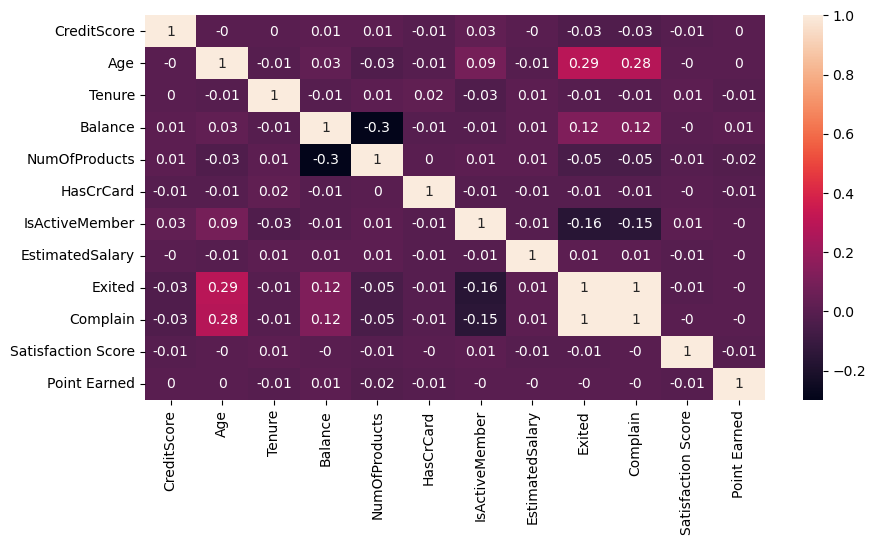

In [109]:
plt.figure(figsize=(10,5))
df_int_corr = df[df_int].corr()
sns.heatmap(round(df_int_corr,2), annot=True)
plt.show()

## Laber Encoder and Data Correlation.

In [114]:
from sklearn.preprocessing import LabelEncoder

In [117]:
def encoderCategoryColumn(data):
    labelEncoder = LabelEncoder()
    for i in df_cat:
        df[i] = labelEncoder.fit_transform(df[i])
    return df

In [118]:
df = encoderCategoryColumn(df)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,2.0,0,464.0
1,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,3.0,0,456.0
2,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,3.0,0,377.0
3,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,5.0,1,350.0
4,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,5.0,1,425.0


In [119]:
df[df_cat]

,Geography,Gender,Card Type
0,0,0,0
1,2,0,0
2,0,0,0
3,0,0,1
4,2,0,1
...,...,...,...
9995,0,1,0
9996,0,1,2
9997,0,0,3
9998,1,1,1


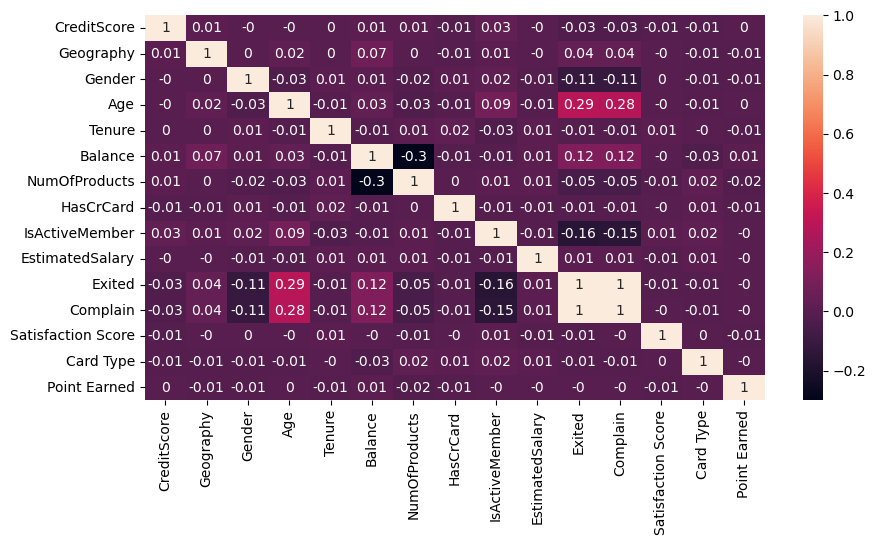

In [120]:
plt.figure(figsize=(10,5))
df_corr = df.corr()
sns.heatmap(round(df_corr,2), annot=True)
plt.show()

## Feature Selection by Lasso Model. 

In [126]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

In [121]:
X = df.drop('Exited', axis=1)
y = df.loc[:, ('Exited')]

In [127]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds 
kf=KFold(n_splits=5, shuffle=True)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [140]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X, y)

Lasso(alpha=1e-05)

In [141]:
import numpy as np
lasso1_coef = np.abs(lasso1.coef_)

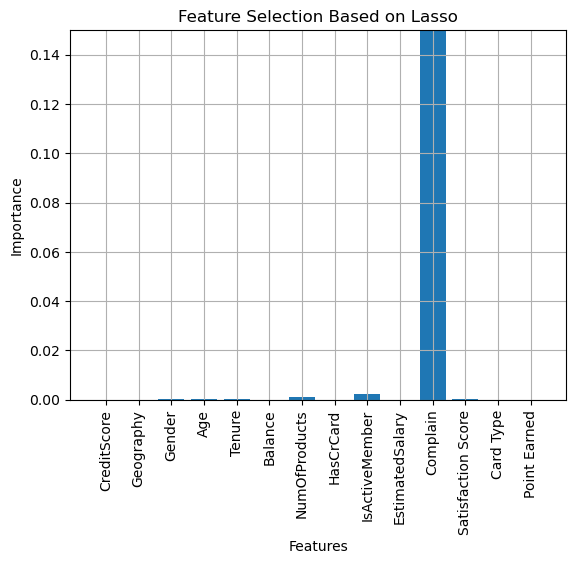

In [142]:
plt.bar(X.columns, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

* ok! we can see the columns has effect on Exited are = {Age, Complain, Balance}, but lets do some visualization maybe we can see another columns..

# EDA

In [146]:
df_vis = main_data.copy()
df_vis.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Count of Exited Customer by Gender

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


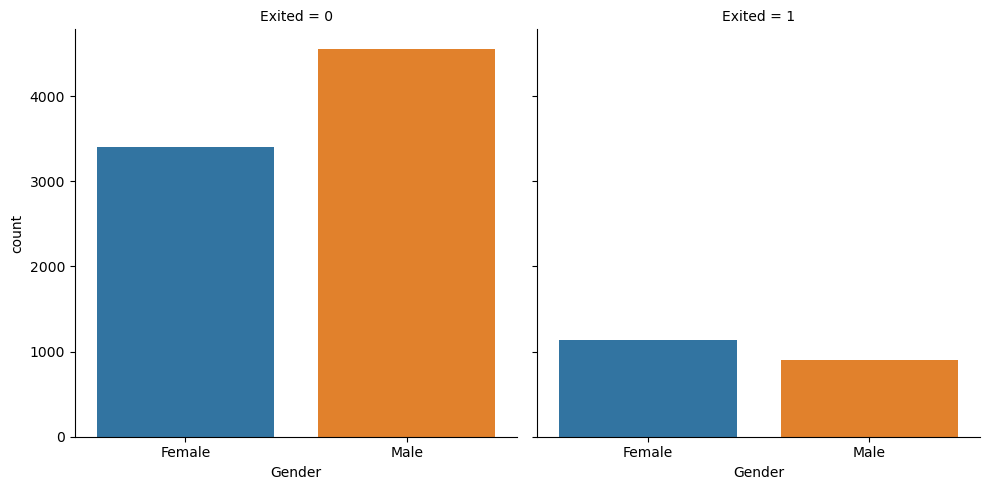

In [148]:
sns.catplot(data=df_vis, kind='count', x='Gender', col='Exited')
plt.show()

### Count of Exited Customer by Gender and Card Type

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


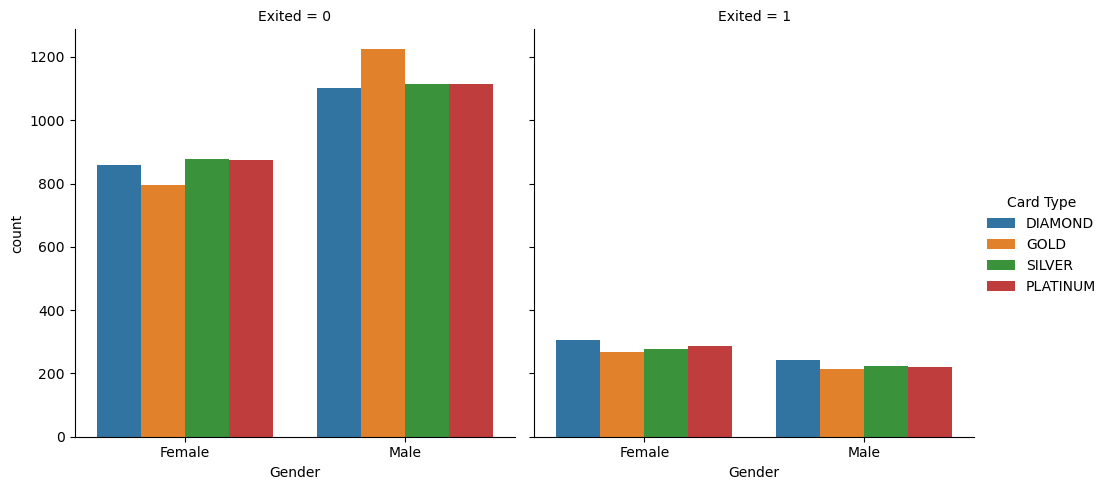

In [150]:
sns.catplot(data=df_vis, kind='count', x='Gender', col='Exited', hue='Card Type')
plt.show()

### Count of Exited Customer by Gender and Card Type with Geography

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


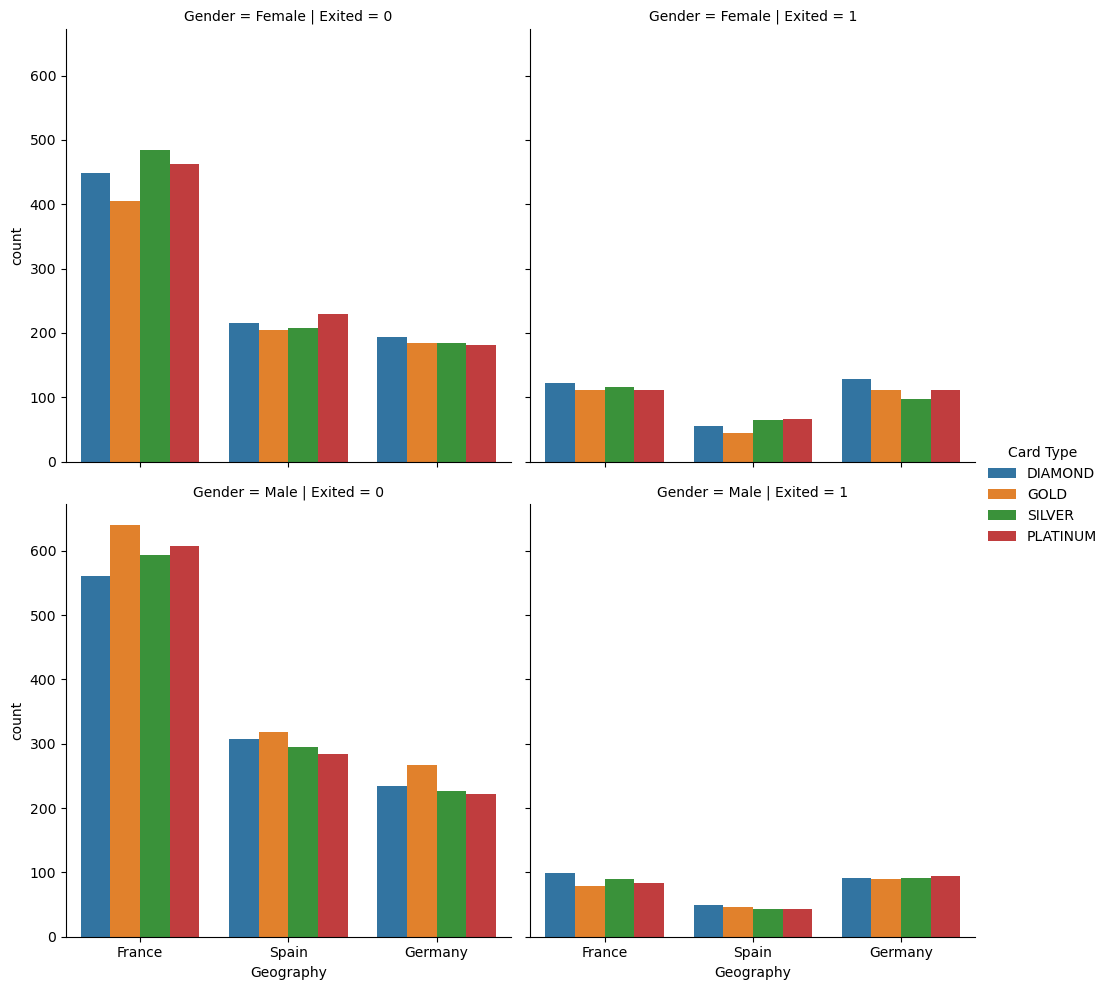

In [152]:
sns.catplot(data=df_vis, kind='count', x='Geography', col='Exited', hue='Card Type', row='Gender')
plt.show()

### Imapct the Age on Exited Customer with Card Type

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


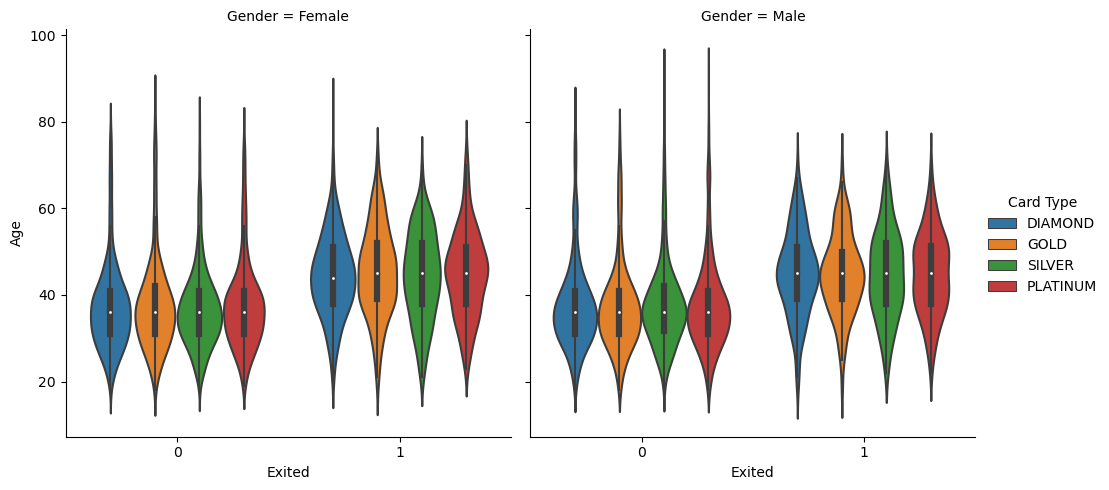

In [154]:
sns.catplot(data=df_vis, kind='violin', x='Exited', y='Age', hue='Card Type', col='Gender')
plt.show()

### Imapct the Complain on Exited Customer with Card Type and Age

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


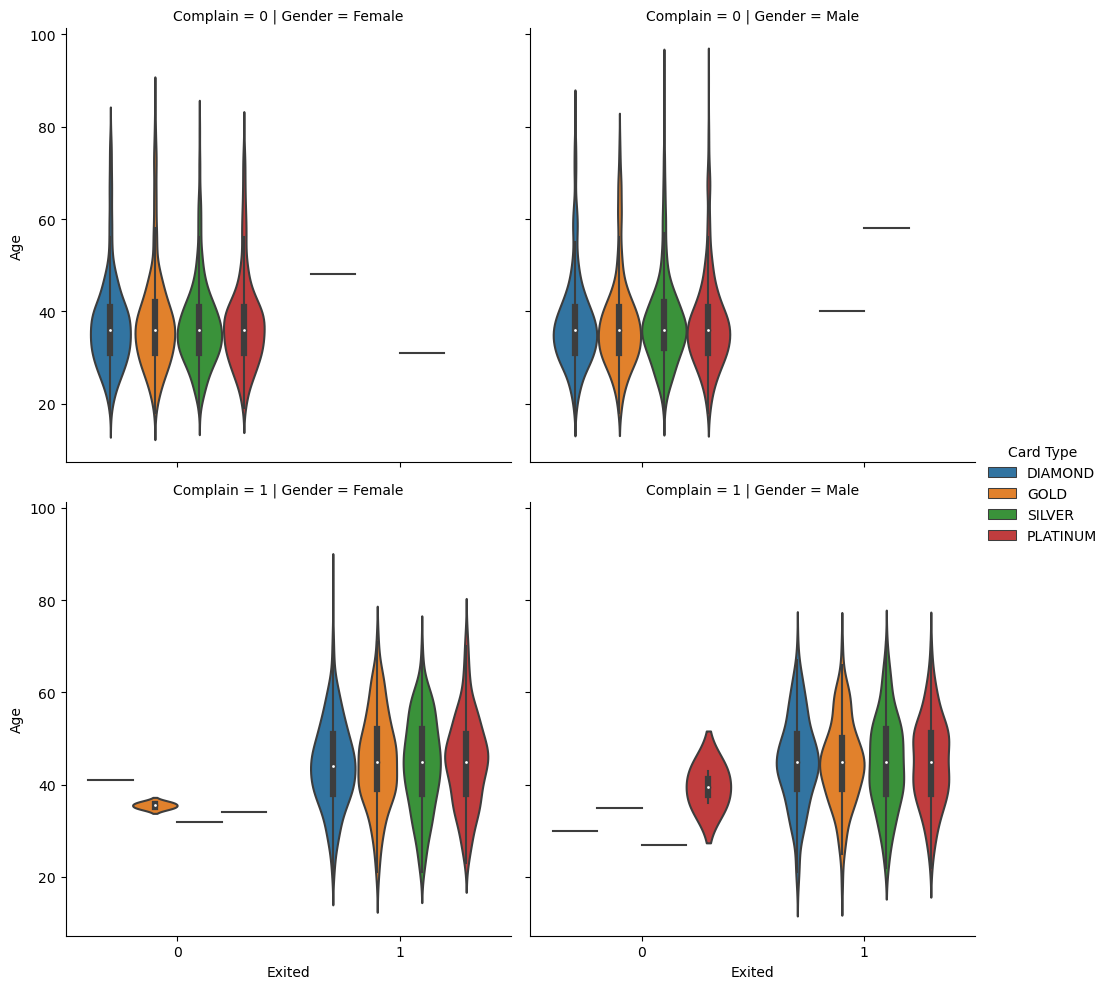

In [155]:
sns.catplot(data=df_vis, kind='violin', x='Exited', y='Age', hue='Card Type', col='Gender', row='Complain')
plt.show()

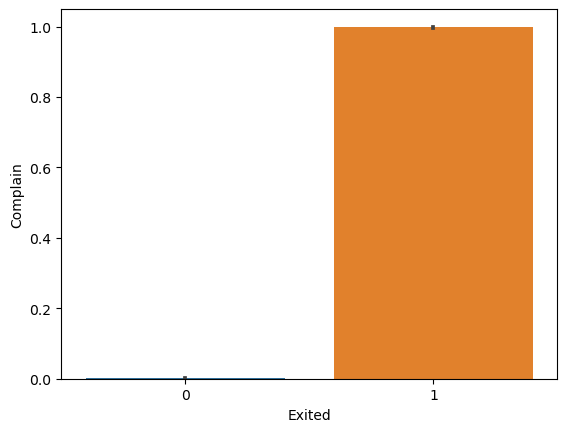

In [162]:
sns.barplot(data=df_vis, x='Exited', y='Complain')
plt.show()

### Imapct if the customer is Active or Not on Exited Customer with Card Type and Age

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


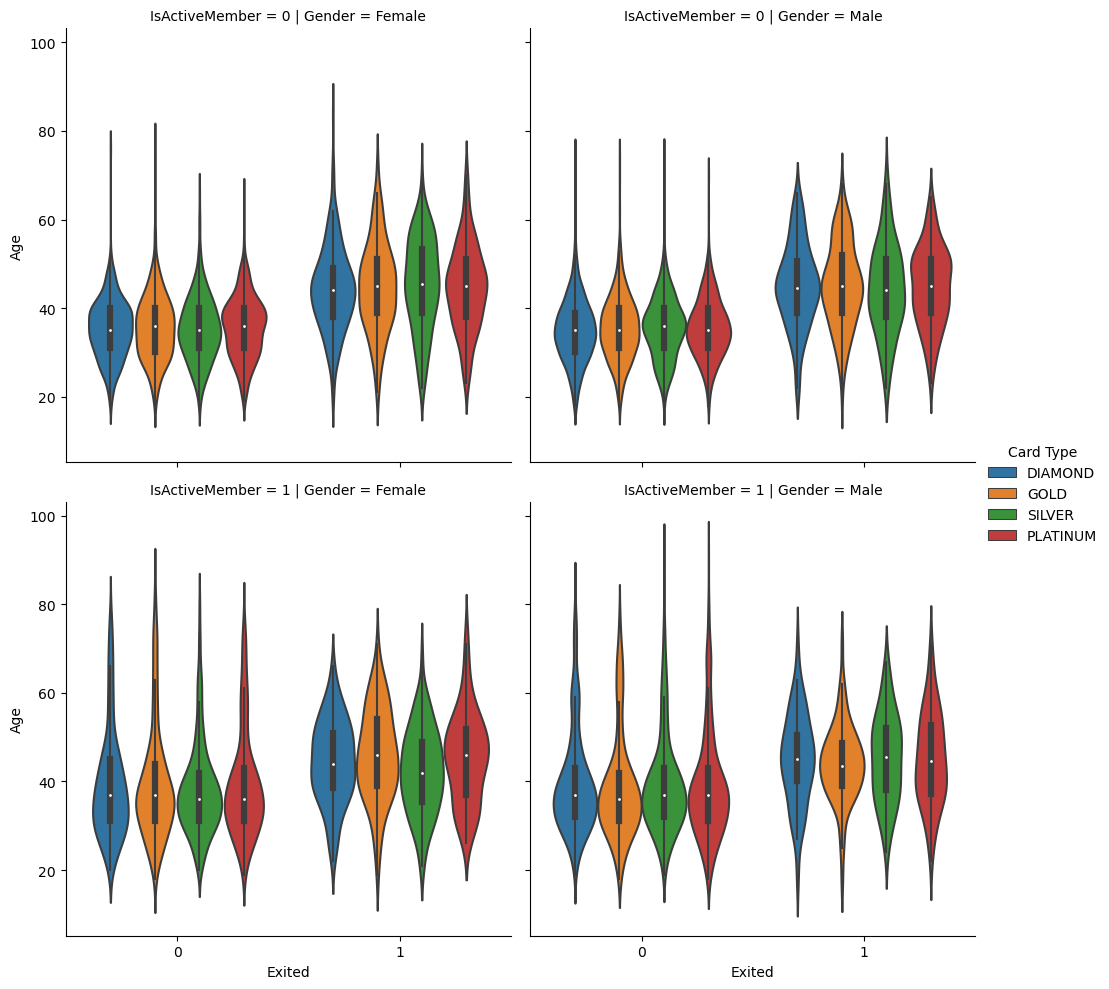

In [163]:
sns.catplot(data=df_vis, kind='violin', x='Exited', y='Age', hue='Card Type', col='Gender', row='IsActiveMember')
plt.show()

### Imapct if the customer is Active or Not with EstimatedSalary on Exited Customer 

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


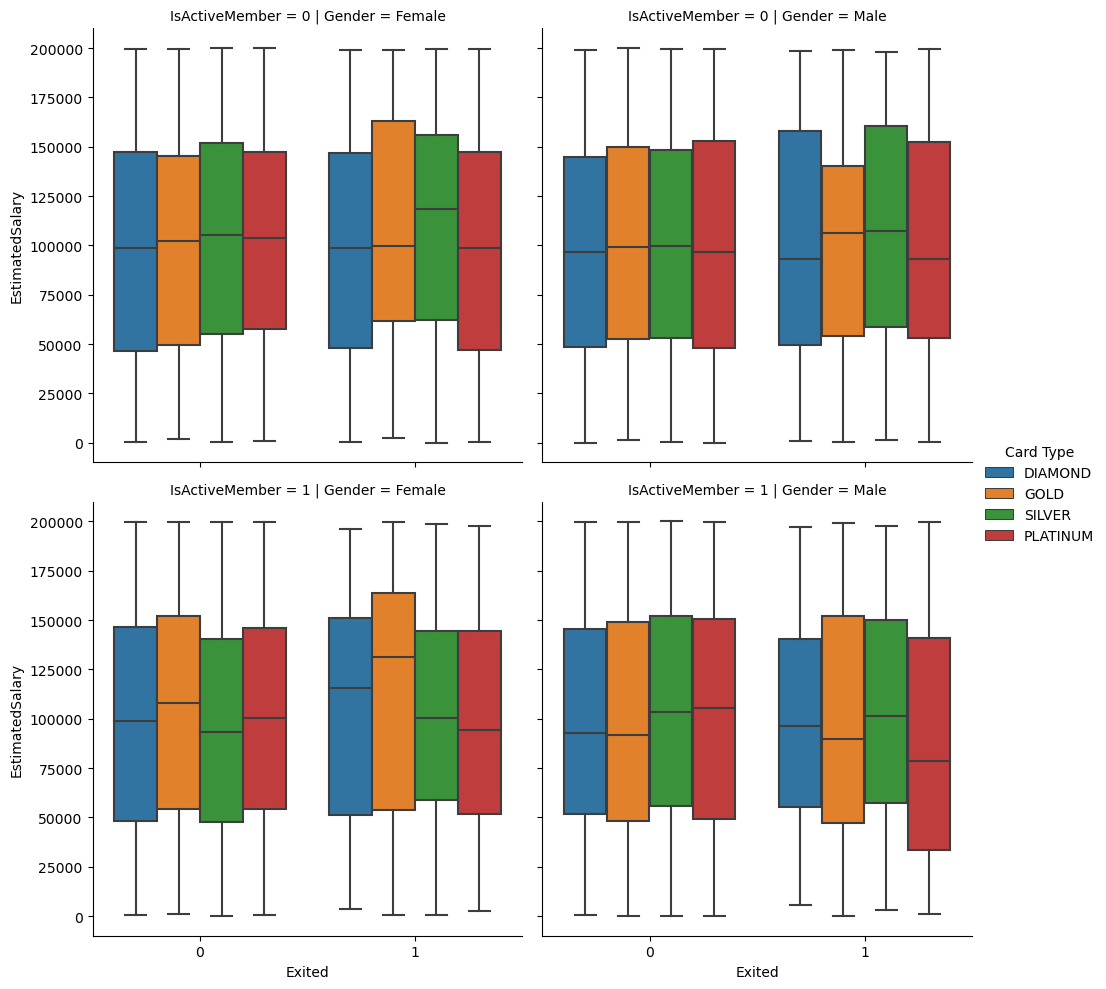

In [165]:
sns.catplot(data=df_vis, kind='box', x='Exited', y='EstimatedSalary', hue='Card Type', col='Gender', row='IsActiveMember')
plt.show()

# Time of Model..

* We will use models like = {KNN, SVM, Logistic Regression, Decision Tree, Random Forest, Ada Boosting, Gradient Boosting, XG Boosting}

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### Scaling The Data

In [170]:
X_scale = MinMaxScaler().fit_transform(X)

### Split the Data

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=2342024)

### Decision Tree Classifier.

In [178]:
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 10)}
    # decision tree model
    dtree_model = DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [179]:
best_params_dt = dtree_grid_search(X_train, y_train, 5)
best_params_dt

{'criterion': 'entropy', 'max_depth': 3}

In [182]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [183]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [185]:
y_predicted_dt = model_dt.predict(X_test)

In [188]:
def evaluationModel(y_true, y_pred):
    cn = confusion_matrix(y_true, y_pred)
    sns.heatmap(cn, annot=True,fmt='.2f')
    plt.show()
    cr = classification_report(y_true, y_pred)
    print(cr)

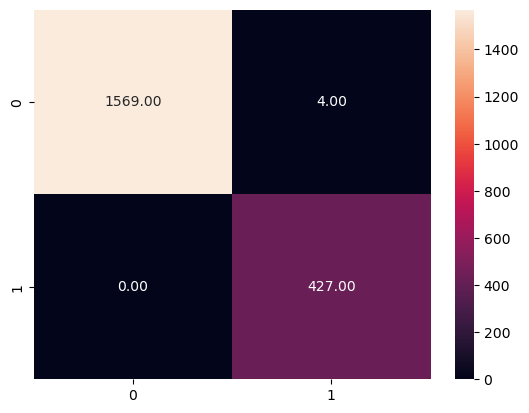

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1573
         1.0       0.99      1.00      1.00       427

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [189]:
evaluationModel(y_test, y_predicted_dt)

# Random Forest Model.

In [204]:
def randomForest_grid_search(X,y,nfolds):
    param_grid = {'n_estimators': [25, 50, 100], 'max_depth': [3, 6, 9]} 
    randomForest_model = RandomForestClassifier()
    randomForest_gscv = GridSearchCV(randomForest_model, param_grid, cv=nfolds)
    randomForest_gscv.fit(X, y)
    return randomForest_gscv.best_estimator_

In [205]:
best_params_rf = randomForest_grid_search(X_train, y_train, 5)
best_params_rf

RandomForestClassifier(max_depth=6, n_estimators=25)

In [206]:
model_rf = RandomForestClassifier(max_depth=6, n_estimators=25)

In [207]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=25)

In [211]:
y_predicted_rf = model_rf.predict(X_test)

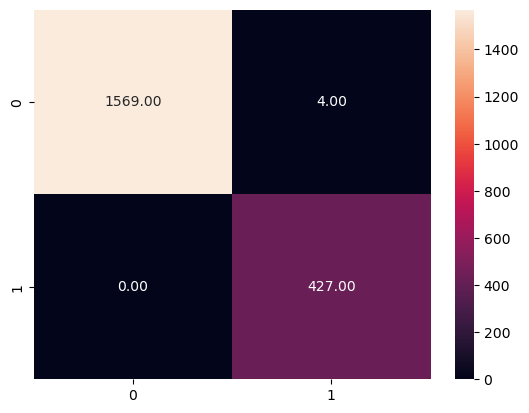

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1573
         1.0       0.99      1.00      1.00       427

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [212]:
evaluationModel(y_test, y_predicted_rf)

# AdaBoosting Model.

In [223]:
def adaBoosting_grid_search(X,y,nfolds):
    param_grid = {"n_estimators": [1,2,3,4,5,6], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    ada_model = AdaBoostClassifier(algorithm='SAMME')
    ada_gscv = GridSearchCV(ada_model, param_grid, cv=nfolds)
    ada_gscv.fit(X, y)
    return ada_gscv.best_params_

In [224]:
best_params_ada = adaBoosting_grid_search(X_train, y_train, 5)
best_params_ada

{'learning_rate': 0.0001, 'n_estimators': 1}

In [225]:
model_ada = AdaBoostClassifier(algorithm='SAMME',learning_rate= 0.0001, n_estimators= 1)

In [226]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.0001, n_estimators=1)

In [227]:
y_predicted_ada = model_ada.predict(X_test)

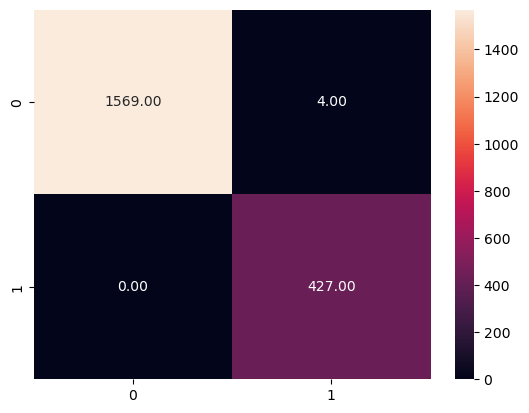

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1573
         1.0       0.99      1.00      1.00       427

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [228]:
evaluationModel(y_test, y_predicted_ada)

# Gradient Boosting.

In [229]:
def gBoosting_grid_search(X,y,nfolds):
    param_grid = {
        "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
        "max_depth":[3,5,8],
        "n_estimators":[10]}
    gb_model = GradientBoostingClassifier()
    gb_gscv = GridSearchCV(gb_model, param_grid, cv=nfolds)
    gb_gscv.fit(X, y)
    return gb_gscv.best_params_

In [231]:
best_params_gb = gBoosting_grid_search(X_train, y_train, 5)
best_params_gb

{'learning_rate': 0.075, 'max_depth': 3, 'n_estimators': 10}

In [232]:
model_gb = GradientBoostingClassifier(learning_rate=0.075, max_depth=3, n_estimators=10)

In [233]:
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.075, n_estimators=10)

In [234]:
y_predicted_gb = model_gb.predict(X_test)

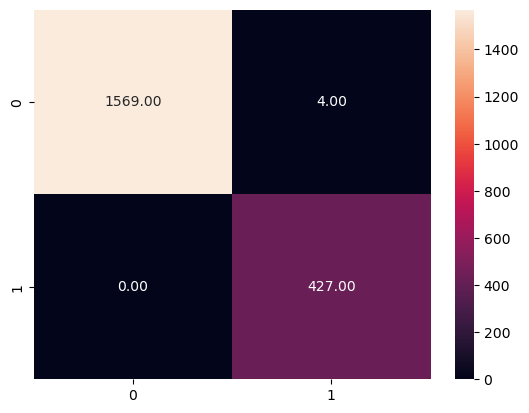

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1573
         1.0       0.99      1.00      1.00       427

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [235]:
evaluationModel(y_test, y_predicted_gb)

# XGBoostin Model.

In [243]:
def xgBoosting_grid_search(X,y,nfolds):
    param_grid = {"learning_rate": (0.05, 0.10, 0.15), 'gamma': [0.5, 1, 1.5, 2, 5], "max_depth":[3,5,8]}
    xgb_model = XGBClassifier()
    xgb_gscv = GridSearchCV(xgb_model, param_grid, cv=nfolds)
    xgb_gscv.fit(X, y)
    return xgb_gscv.best_params_

In [244]:
best_params_xgb = xgBoosting_grid_search(X_train, y_train, 5)
best_params_xgb

{'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 3}

In [245]:
model_xgb = XGBClassifier(gamma=0.5, learning_rate=0.05, max_depth=3)

In [246]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [247]:
y_predicted_xgb = model_xgb.predict(X_test)

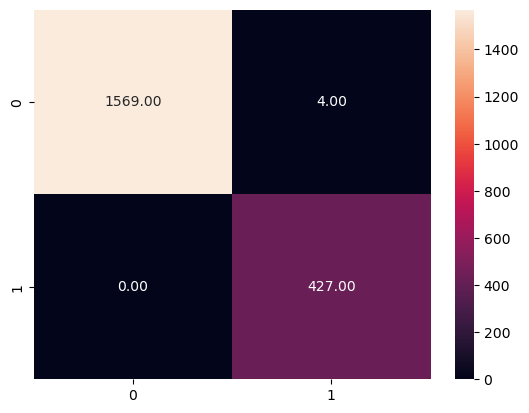

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1573
         1.0       0.99      1.00      1.00       427

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [248]:
evaluationModel(y_test, y_predicted_xgb)